# Исследование тарифных планов «Смарт» и «Ультра»

**Краткое описание:** Заказчик - компания «Мегалайн» - федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
    
**Цель проекта:** Сделать предварительный анализ тарифов на небольшой выборке клиентов, проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<i>Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.</i>

**План работы:**
1. выгрузить данные, осуществить первичный обзор;
2. определить, есть ли пропуски в данных; заполнить пропуски или удалить строки с пропусками;
3. проверить данные на наличие явных и неявных дубликатов, исправить данные;
4. измененить тип данных;
5. объединить таблицы;
6. расчет новых значений, добавление их в новые колонки;
7. анализ данных в соответствии с поставленной целью проекта;
8. проверка гипотез;
9. сформировать вывод, полученный из результатов анализа.


## Обзор данных

In [198]:
import pandas as pd
import numpy as np
from scipy import stats as st

In [199]:
df_calls = pd.read_csv('calls.csv')
df_internet = pd.read_csv('internet.csv')
df_messages = pd.read_csv('messages.csv')
df_tariffs = pd.read_csv('tariffs.csv')
df_users = pd.read_csv('users.csv')

In [200]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [201]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [202]:
df_calls.columns

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

In [203]:
df_calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [204]:
df_internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [205]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [206]:
df_internet.columns

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

In [207]:
df_internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


In [208]:
df_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [209]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [210]:
df_messages.columns

Index(['id', 'message_date', 'user_id'], dtype='object')

In [211]:
df_messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [212]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [213]:
df_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [214]:
df_tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [215]:
df_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [216]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [217]:
df_users.columns

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

In [218]:
df_users.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


**Проблемы, выявленные после первичного обзора данных:**
1. В таблицах колонки с датами имеют тип `object`, а должны иметь тип `datetime`.
2. В таблице со звонками в колонке с продолжительностью звонков данные отображены в минутах, но не округлены в большую сторону в соответствии с политикой компании.
3. В таблице с данными интернет-трафика есть колонка `'Unnamed: 0'`, которая не была отмечена в описании. Похоже, что в ней содержутся индексы строк. Ее можно удалить.
4. В таблице с данными пользователей в колонке с датами прекращения пользования тарифом есть пропуски, поскольку тариф используется на момент выгрузки данных.


## Предобработка данных

### Изменение типов данных

Изменим тип данных колонок с датами во всех таблицах на `datetime`.

In [219]:
df_users['churn_date'] = pd.to_datetime(
    df_users['churn_date'], format='%Y-%m-%d'
    )
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')

df_users.info() # проверяем, поменялся ли тип данных в колонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [220]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [221]:
df_internet['session_date'] = pd.to_datetime(
    df_internet['session_date'], format='%Y-%m-%d'
    )
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


In [222]:
df_messages['message_date'] = pd.to_datetime(
    df_messages['message_date'], format='%Y-%m-%d'
    )
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


### Заполнение пропусков

В колонке `'churn_date'` есть пропуски. Их можно было бы заполнить сегодняшней датой или датой выгрузки данных (если бы мы ее знали), но сначала посмотрим на минимальные и максимальные значения столбца.

In [223]:
df_users['churn_date'].min()

Timestamp('2018-08-17 00:00:00')

In [224]:
df_users['churn_date'].max()

Timestamp('2018-12-30 00:00:00')

Посмотрим максимальную дату и минимальную в других таблицах выборки.

In [225]:
df_calls['call_date'].max()

Timestamp('2018-12-31 00:00:00')

In [226]:
df_internet['session_date'].max()

Timestamp('2018-12-31 00:00:00')

In [227]:
df_messages['message_date'].max()

Timestamp('2018-12-31 00:00:00')

In [228]:
df_calls['call_date'].min()

Timestamp('2018-01-01 00:00:00')

In [229]:
df_internet['session_date'].min()

Timestamp('2018-01-01 00:00:00')

In [230]:
df_messages['message_date'].min()

Timestamp('2018-01-02 00:00:00')

Если заполнить значения сегодняшним числом, то разница между датами будем слишком большая (больше трех лет). Если считать, что день выгрузки - это максимальная дата колонки, то заполнить пропуски можно максимальной датой колонки плюс один день, поскольку пропуск означает, что на день выгрузки тариф еще действовал. Полученная дата будет совпадать с максимальной датой, указанной в других таблицах. Так же мы удостоверились, что нам предоставили данные с 01.01.2018 г. по 31.12.2018 г.

In [231]:
df_users['churn_date'] = (
    df_users['churn_date'].fillna(
        df_users['churn_date'].max() + pd.DateOffset(days=1)
    )
)

Проверим правильность заполнения пропусков.


In [232]:
df_users['churn_date'].isna().sum()

0

In [233]:
df_users['churn_date'].max()

Timestamp('2018-12-31 00:00:00')

### Удаление неинформативной колонки

В таблице с интернет-трафиком есть колонка `'Unnamed: 0'`. Вызвав метод `describe()`, стало понятно, что эта колонка содержит нумерацию строк. Удалим эту колонку, чтобы она не мешала при объединении таблиц.

In [234]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [235]:
df_internet = df_internet.drop('Unnamed: 0', axis=1)
df_internet.head() # проверяем, как выглядит датасет

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


### Округление продолжительности звонков

В описании данных было указано, что каждый звонок округляется до полных минут в сторону увеличения. Перезапишем данные в колонке `'duration'` в таблице со звонками поменяем тип на `int`.

In [236]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [237]:
df_calls['duration'] = np.ceil(df_calls['duration']).astype('int')

In [238]:
df_calls.head() # проверяем, как теперь выглядит колонка

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [239]:
df_calls.info() # проверяем, изменился ли тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.2+ MB


### Проверка на наличие дубликатов в таблице `df_users`

In [240]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [241]:
df_users.duplicated().sum()

0

## Формирование нового датафрейма


### Расчет количества сделанных звонков и израсходованных минут разговора по месяцам

Для того, чтобы создать сводную таблицу с расчетом количества звонков помесячно для каждого клиента, необходимо добавить колонку с месяцами в таблицу с данными о звонках.

In [242]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [243]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


Создаем и редактируем сводную таблицу.

In [244]:
df_calls_pt = df_calls.pivot_table(index=['user_id', 'month'], values='duration',
                             aggfunc=['count', 'sum']).reset_index()

df_calls_pt.head()

,user_id,month,count,sum
,,,duration,duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [245]:
df_calls_pt.columns = df_calls_pt.columns.droplevel(1)

In [246]:
df_calls_pt.head()

,user_id,month,count,sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [247]:
df_calls_pt = df_calls_pt.rename(columns={
    'count' : 'calls_count', 'sum' : 'calls_sum'
    })
df_calls_pt.head()

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


### Расчет количества отправленных сообщений по месяцам

Для того, чтобы создать сводную таблицу с расчетом количества отправленных сообщений помесячно для каждого клиента, необходимо добавить колонку с месяцами в таблицу с данными о сообщениях.

In [248]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [249]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Создаем и редактируем сводную таблицу.

In [250]:
df_messages_pt = df_messages.pivot_table(index=['user_id', 'month'], values='id',
                             aggfunc='count').reset_index()

df_messages_pt.head()

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [251]:
df_messages_pt = df_messages_pt.rename(columns={'id' : 'messages_count'})
df_messages_pt.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


### Расчет объема израсходованного интернет-трафика по месяцам

Для того, чтобы создать сводную таблицу с расчетом израсходонного интернет-трафика помесячно для каждого клиента, необходимо добавить колонку с месяцами в таблицу с данными об интернет-трафике.

In [252]:
df_internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [253]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


Создаем и редактируем сводную таблицу.

In [254]:
df_internet_pt = df_internet.pivot_table(
    index=['user_id', 'month'],
    values='mb_used',
    aggfunc='sum').reset_index()

df_internet_pt.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Согласно политике компании месячный интернет-трафик округляется до гигабайтов в большую сторону. Необходимо перевести данные в колонке `'mb_used'` в гигабайты и округлить. Попробуем сделать это с помощью функции.

In [255]:
# определим минимальное и максимальное значения колонки
df_internet_pt['mb_used'].describe() 

count     3203.000000
mean     17266.708626
std       7516.356902
min          0.000000
25%      12526.905000
50%      16963.110000
75%      21432.175000
max      49745.690000
Name: mb_used, dtype: float64

In [256]:
df_internet_pt['gb_used'] = np.ceil(df_internet_pt['mb_used'] / 1024)

df_internet_pt.head()

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3.0
1,1000,6,23233.77,23.0
2,1000,7,14003.64,14.0
3,1000,8,14055.93,14.0
4,1000,9,14568.91,15.0


In [257]:
# удаляем колонку с мегабайтами
df_internet_pt = df_internet_pt.drop('mb_used', axis=1) 

 # изменяем тип данных
df_internet_pt['gb_used'] = df_internet_pt['gb_used'].astype('int')

df_internet_pt.head() # проверяем датасет

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


### Объединение сводных таблиц

Объединим полученные сводные таблицы, изменим тип данных на `int`, где небходимо.

In [258]:
df_pt_1 = df_calls_pt.merge(df_messages_pt, on=['user_id', 'month'], how='outer')

df_pt_1.head(10)

,user_id,month,calls_count,calls_sum,messages_count
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0
5,1000,10,57.0,350.0,73.0
6,1000,11,43.0,338.0,58.0
7,1000,12,46.0,333.0,70.0
8,1001,11,59.0,430.0,NaN
9,1001,12,63.0,414.0,NaN


In [259]:
df_pt_2 = df_pt_1.merge(df_internet_pt, on=['user_id', 'month'], how='outer')

df_pt_2.head(10)

,user_id,month,calls_count,calls_sum,messages_count,gb_used
0,1000,5,22.0,159.0,22.0,3.0
1,1000,6,43.0,172.0,60.0,23.0
2,1000,7,47.0,340.0,75.0,14.0
3,1000,8,52.0,408.0,81.0,14.0
4,1000,9,58.0,466.0,57.0,15.0
5,1000,10,57.0,350.0,73.0,15.0
6,1000,11,43.0,338.0,58.0,15.0
7,1000,12,46.0,333.0,70.0,10.0
8,1001,11,59.0,430.0,NaN,18.0
9,1001,12,63.0,414.0,NaN,14.0


In [260]:
df_pt_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls_count     3174 non-null   float64
 3   calls_sum       3174 non-null   float64
 4   messages_count  2717 non-null   float64
 5   gb_used         3203 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


В колонках `'calls_count'`, `''calls_sum''`, `'messages_count'` и `'gb_used'` появились пропуски после обединения таблиц, поскольку клиенты не звонили, не отправляли сообщения и не пользовались интернетом в некоторые месяцы. Заполним пропуски нулями и изменим тип данных в колонках.

In [261]:
df_pt_2['messages_count'] = df_pt_2['messages_count'].fillna(0)
df_pt_2['gb_used'] = df_pt_2['gb_used'].fillna(0)
df_pt_2['calls_count'] = df_pt_2['calls_count'].fillna(0)
df_pt_2['calls_sum'] = df_pt_2['calls_sum'].fillna(0)

In [262]:
df_pt_2 = df_pt_2.astype('int')
df_pt_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   user_id         3214 non-null   int64
 1   month           3214 non-null   int64
 2   calls_count     3214 non-null   int64
 3   calls_sum       3214 non-null   int64
 4   messages_count  3214 non-null   int64
 5   gb_used         3214 non-null   int64
dtypes: int64(6)
memory usage: 175.8 KB


### Добавление данных о клиентах и тарифах

К таблице `df_pt_2` добавим данные из таблицы `df_users` и удалим ненужные колонки.

In [263]:
df_pt_3 = df_pt_2.merge(df_users, on='user_id', how='left')

df_pt_3.head()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5,22,159,22,3,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6,43,172,60,23,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7,47,340,75,14,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8,52,408,81,14,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9,58,466,57,15,52,2018-12-31,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [264]:
df_pt_3 = df_pt_3.drop(
    ['first_name', 'last_name', 'churn_date', 'reg_date'],
    axis=1
    )
df_pt_3.head()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,age,city,tariff
0,1000,5,22,159,22,3,52,Краснодар,ultra
1,1000,6,43,172,60,23,52,Краснодар,ultra
2,1000,7,47,340,75,14,52,Краснодар,ultra
3,1000,8,52,408,81,14,52,Краснодар,ultra
4,1000,9,58,466,57,15,52,Краснодар,ultra


In [265]:
df_pt_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         3214 non-null   int64 
 1   month           3214 non-null   int64 
 2   calls_count     3214 non-null   int64 
 3   calls_sum       3214 non-null   int64 
 4   messages_count  3214 non-null   int64 
 5   gb_used         3214 non-null   int64 
 6   age             3214 non-null   int64 
 7   city            3214 non-null   object
 8   tariff          3214 non-null   object
dtypes: int64(7), object(2)
memory usage: 251.1+ KB


In [266]:
# переименовываем колонку с тарифами, чтобы ее наименование совпадало 
# с наименованием соответствующей колонки таблицы с тарифами
df_pt_3 = df_pt_3.rename(columns={'tariff' : 'tariff_name'})
df_pt_3.columns

Index(['user_id', 'month', 'calls_count', 'calls_sum', 'messages_count',
       'gb_used', 'age', 'city', 'tariff_name'],
      dtype='object')

Объединим таблицу `df_pt_3` с таблицей `df_tariffs`.

In [267]:
data = df_pt_3.merge(df_tariffs, on='tariff_name', how='left')

data.head()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,age,city,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,3,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,60,23,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,75,14,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,81,14,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,57,15,52,Краснодар,ultra,1000,30720,3000,1950,150,1,1


Приведем данные об интернет-трафике к одной единице измерения - гигабайтам.

In [268]:
data.loc[data['mb_per_month_included'] == 15360, 'mb_per_month_included'] = 15
data.loc[data['mb_per_month_included'] == 30720, 'mb_per_month_included'] = 30

# переименовываем колонку
data = data.rename(columns={'mb_per_month_included' : 'gb_per_month_included'}) 

data.head() # проверяем, как выглядит датасет

,user_id,month,calls_count,calls_sum,messages_count,gb_used,age,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,3,52,Краснодар,ultra,1000,30,3000,1950,150,1,1
1,1000,6,43,172,60,23,52,Краснодар,ultra,1000,30,3000,1950,150,1,1
2,1000,7,47,340,75,14,52,Краснодар,ultra,1000,30,3000,1950,150,1,1
3,1000,8,52,408,81,14,52,Краснодар,ultra,1000,30,3000,1950,150,1,1
4,1000,9,58,466,57,15,52,Краснодар,ultra,1000,30,3000,1950,150,1,1


In [269]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3214 non-null   int64 
 1   month                  3214 non-null   int64 
 2   calls_count            3214 non-null   int64 
 3   calls_sum              3214 non-null   int64 
 4   messages_count         3214 non-null   int64 
 5   gb_used                3214 non-null   int64 
 6   age                    3214 non-null   int64 
 7   city                   3214 non-null   object
 8   tariff_name            3214 non-null   object
 9   messages_included      3214 non-null   int64 
 10  gb_per_month_included  3214 non-null   int64 
 11  minutes_included       3214 non-null   int64 
 12  rub_monthly_fee        3214 non-null   int64 
 13  rub_per_gb             3214 non-null   int64 
 14  rub_per_message        3214 non-null   int64 
 15  rub_per_minute       

### Расчет помесячной выручки с каждого пользователя

Чтобы посчитать выручку, необходимо к стоимости тарифного плана прибавить стоимость оказанных услуг, вышедших за пределы тарифного плана, в соответствии с тарифом. Сделаем расчет в новой колонке.

In [270]:
def plus_tariff(count_col, incl_col, per_col):
    income = np.where(
        (data[count_col] - data[incl_col]) < 0,
        0,
        (data[count_col] - data[incl_col])
        ) * data[per_col]

    return income

In [271]:
data['income'] = (
    data['rub_monthly_fee']
    + plus_tariff('calls_sum', 'minutes_included', 'rub_per_minute')
    + plus_tariff('messages_count', 'messages_included', 'rub_per_message')
    + plus_tariff('gb_used', 'gb_per_month_included', 'rub_per_gb')
)

In [272]:
data.head(10) # проверяем, как выглядит датасет

,user_id,month,calls_count,calls_sum,messages_count,gb_used,age,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5,22,159,22,3,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
1,1000,6,43,172,60,23,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
2,1000,7,47,340,75,14,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
3,1000,8,52,408,81,14,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
4,1000,9,58,466,57,15,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
5,1000,10,57,350,73,15,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
6,1000,11,43,338,58,15,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
7,1000,12,46,333,70,10,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
8,1001,11,59,430,0,18,41,Москва,smart,50,15,500,550,200,3,3,1150
9,1001,12,63,414,0,14,41,Москва,smart,50,15,500,550,200,3,3,550


**Итог**

Расчитан объем услуг, к которым пользователи прибегали каждый месяц, посчитана ежемесячная выручка для каждого клиента. 


Сформирован датасет для дальнейшего анализа, который включает в себя информацию о клиенте, объеме использованных им услуг, тариф и информация о нем, ежемесячная выручка.

## Анализ данных

Для каждого тарифа определим наличие связей между данными, средние значения, дисперсию и стандартные отклонения и сравним разбросы.

### Анализ поведения пользователей тарифа "Ультра"

In [273]:
data_ultra = data.query('tariff_name == "ultra"')
data_ultra.head()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,age,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5,22,159,22,3,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
1,1000,6,43,172,60,23,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
2,1000,7,47,340,75,14,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
3,1000,8,52,408,81,14,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950
4,1000,9,58,466,57,15,52,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950


In [274]:
data_ultra['city'].value_counts().head()

Москва             225
Санкт-Петербург     60
Новосибирск         44
Пенза               43
Краснодар           41
Name: city, dtype: int64

In [275]:
 # посчитаем процент пользователей, находящихся в первой тройке городов по их количеству
int(len(data_ultra.query('city == "Москва"')) / len(data_ultra) * 100)

22

In [276]:
int(len(data_ultra.query('city == "Санкт-Петербург"')) / len(data_ultra) * 100)

6

In [277]:
int(len(data_ultra.query('city == "Новосибирск"')) / len(data_ultra) * 100)

4

Построим гистограммы для колонок с минутами, количеством сообщений и гигабайтами.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55cd8d0a10>]],
      dtype=object)

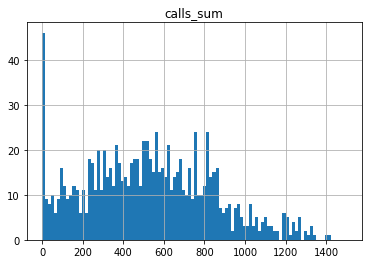

In [278]:
data_ultra.hist('calls_sum', bins=100, range=(0, 1500))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55cd843fd0>]],
      dtype=object)

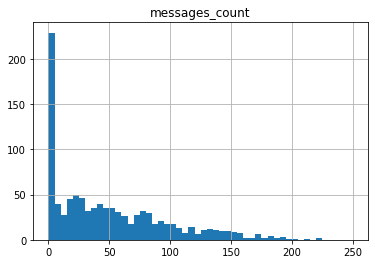

In [279]:
data_ultra.hist('messages_count', bins=50, range=(0, 250))

In [280]:
# посчитаем процент строк, в которых значение отправленных сообщений равно нулю
int(len(data_ultra.query('messages_count == 0')) / len(data_ultra) * 100)

19

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55cd1604d0>]],
      dtype=object)

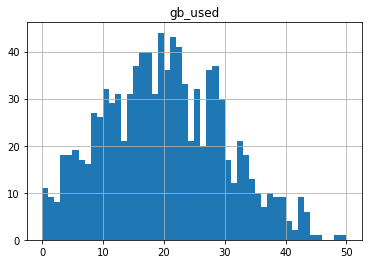

In [281]:
data_ultra.hist('gb_used', bins=50, range=(0, 50))

Основная масса пользователей тарифа "Ультра" использует в месяц:
* от 220 до 860 минут;
* до 80 сообщений, при этом в 19% случаев сообщения не использовались;
* от 9 до 30 Гб интернет-трафика.

Наибольшее количество пользователей тарифа находятся:
* в Москве - 22 %;
* в Санкт-Петербурге - 6 %;
* В Новосибирске - 4 %.

In [282]:
data_ultra.describe()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,age,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000
mean,1263.094416,8.250761,73.392893,526.623350,49.363452,19.494416,46.834518,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,2070.152284
std,140.694908,2.871762,43.916853,317.606098,47.804457,9.853511,17.107979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,6.000000,41.000000,284.000000,6.000000,12.000000,30.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,9.000000,74.000000,518.000000,38.000000,19.000000,45.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,11.000000,104.000000,752.000000,79.000000,27.000000,63.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,12.000000,244.000000,1673.000000,224.000000,49.000000,75.000000,1000.0,30.0,3000.0,1950.0,150.0,1.0,1.0,4800.000000


In [283]:
np.var(data_ultra) # посчитаем дисперсию

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


user_id                   19774.960629
month                         8.238642
calls_count                1926.731929
calls_sum                100771.223617
messages_count             2282.946075
gb_used                      96.993116
age                         292.385814
messages_included             0.000000
gb_per_month_included         0.000000
minutes_included              0.000000
rub_monthly_fee               0.000000
rub_per_gb                    0.000000
rub_per_message               0.000000
rub_per_minute                0.000000
income                   141373.073256
dtype: float64

In [284]:
int(len(data_ultra.query(
    '(gb_used - gb_per_month_included) > 0'
    )) / len(data_ultra) * 100)
# определим процент строк, в которых превышен лимит интернет-трафика

13

Пользователи тарифа "Ультра" ежемесячно в среднем:
* совершают 73 звонка;
* общаются на протяжении 527 минут;
* отправляют 49 сообщений;
* используют 19 Гб интернет-трафика;
* приносят 2070 руб. прибыли (при абонентской плате в 1950 рублей).

Ни один пользователь не выходит за рамки включенных в тариф 3000 минут и 1000 сообщений. Максимальные значения - 1673 минуты и 224 сообщения.

В 13 % случаев превышен лимит интернет-трафика в 30 Гб.

Посчитаем корреляцию и продемонстрируем корреляционную матрицу.

In [285]:
data_ultra_for_corr = data_ultra.drop(
    columns=['user_id', 'city', 'tariff_name', 'messages_included',
             'gb_per_month_included', 'minutes_included', 'rub_monthly_fee',
             'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis=1)
data_ultra_for_corr.head()

,month,calls_count,calls_sum,messages_count,gb_used,age,income
0,5,22,159,22,3,52,1950
1,6,43,172,60,23,52,1950
2,7,47,340,75,14,52,1950
3,8,52,408,81,14,52,1950
4,9,58,466,57,15,52,1950


In [286]:
data_ultra_for_corr.corr()

,month,calls_count,calls_sum,messages_count,gb_used,age,income
month,1.000000,0.136808,0.136540,0.199570,0.139486,-0.005070,0.084825
calls_count,0.136808,1.000000,0.987586,0.087691,0.176171,0.116179,0.083366
calls_sum,0.136540,0.987586,1.000000,0.082084,0.177111,0.112912,0.090650
messages_count,0.199570,0.087691,0.082084,1.000000,0.173901,-0.116735,0.018930
gb_used,0.139486,0.176171,0.177111,0.173901,1.000000,0.004579,0.621388
age,-0.005070,0.116179,0.112912,-0.116735,0.004579,1.000000,-0.079975
income,0.084825,0.083366,0.090650,0.018930,0.621388,-0.079975,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55cf701610>,
      dtype=object)

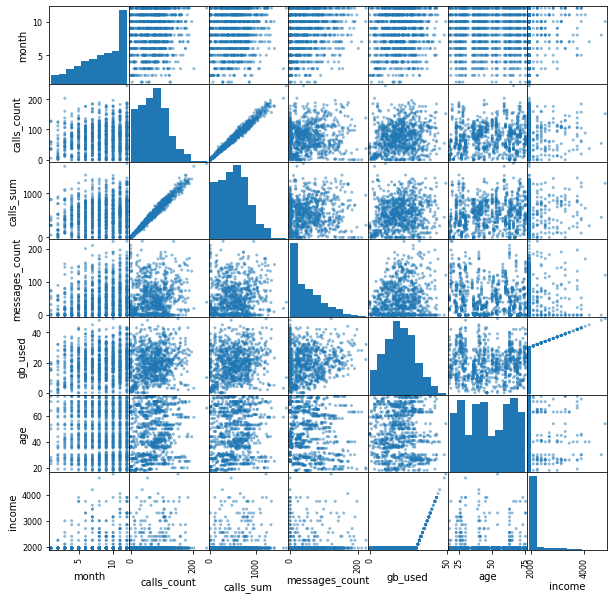

In [287]:
pd.plotting.scatter_matrix(data_ultra_for_corr, figsize=(10, 10))

Было предположение, что может быть обнаружена зависимость объема используемого интернет-трафика от возраста, но такая зависимость не наблюдается.

Наблюдается явная прямая зависимость между количеством звонков и количеством используемых минут, а также зависимость количества гигабайт и прибыли. На графике хорошо видно резкое увеличение прибыли после использования 30 Гб интернет-трафика, которые входят в тарифный план.

### Анализ поведения пользователей тарифа "Смарт"

In [288]:
data_smart = data.query('tariff_name == "smart"')
data_smart.head()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,age,city,tariff_name,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
8,1001,11,59,430,0,18,41,Москва,smart,50,15,500,550,200,3,3,1150
9,1001,12,63,414,0,14,41,Москва,smart,50,15,500,550,200,3,3,550
10,1002,6,15,117,4,11,59,Стерлитамак,smart,50,15,500,550,200,3,3,550
11,1002,7,26,214,11,18,59,Стерлитамак,smart,50,15,500,550,200,3,3,1150
12,1002,8,42,289,13,20,59,Стерлитамак,smart,50,15,500,550,200,3,3,1550


In [289]:
data_smart['city'].value_counts().head()

Москва             386
Санкт-Петербург    210
Ульяновск           81
Казань              74
Уфа                 65
Name: city, dtype: int64

In [290]:
int(len(data_smart.query('city == "Москва"')) / len(data_smart) * 100)
# посчитаем процент пользователей, находящихся в первой тройке городов по их количеству

17

In [291]:
int(len(data_smart.query('city == "Санкт-Петербург"')) / len(data_smart) * 100)

9

In [292]:
int(len(data_smart.query('city == "Ульяновск"')) / len(data_smart) * 100)

3

Построим гистограммы для колонок с минутами, количеством сообщений и гигабайтами.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55cc11d090>]],
      dtype=object)

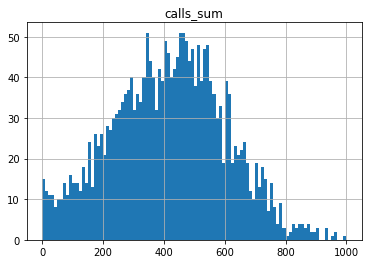

In [293]:
data_smart.hist('calls_sum', bins=100, range=(0, 1000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55cc0e5250>]],
      dtype=object)

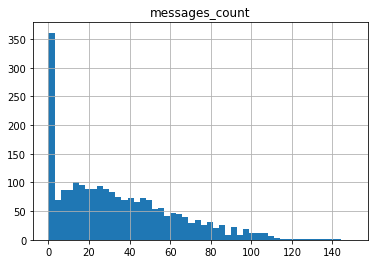

In [294]:
data_smart.hist('messages_count', bins=50, range=(0, 150))

In [295]:
int(len(data_smart.query('messages_count == 0')) / len(data_smart) * 100)
# посчитаем процент строк, в которых значение отправленных сообщений равно нулю

13

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55ca78bad0>]],
      dtype=object)

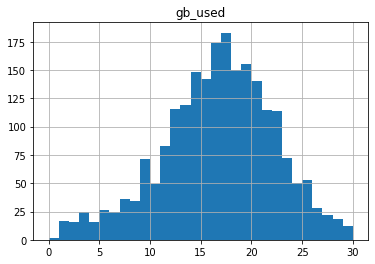

In [296]:
data_smart.hist('gb_used', bins=30, range=(0, 30))

Основная масса пользователей тарифа "Смарт" использует в месяц:
* от 180 до 680 минут;
* до 58 сообщений, при этом в 13% случаев сообщения не использовались;
* от 9 до 24 Гб интернет-трафика.

Наибольшее количество пользователей тарифа находятся:
* в Москве - 17 % ;
* в Санкт-Петербурге - 9 %;
* в Ульяновске - 3 %.

In [297]:
data_smart.describe()

,user_id,month,calls_count,calls_sum,messages_count,gb_used,age,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.000000
mean,1246.506505,8.346792,58.463437,417.934948,33.384029,16.328847,46.556303,50.0,15.0,500.0,550.0,200.0,3.0,3.0,1289.973531
std,146.119496,2.920316,25.939858,190.313730,28.227876,5.747061,16.353371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,818.404367
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,6.000000,40.000000,282.000000,10.000000,13.000000,32.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,550.000000
50%,1239.000000,9.000000,60.000000,422.000000,28.000000,17.000000,47.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,1023.000000
75%,1376.000000,11.000000,76.000000,545.000000,51.000000,20.000000,62.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,1750.000000
max,1499.000000,12.000000,198.000000,1435.000000,143.000000,38.000000,75.000000,50.0,15.0,500.0,550.0,200.0,3.0,3.0,6770.000000


In [298]:
np.var(data_smart) # посчитаем дисперсию

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3721: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


user_id                   21341.328468
month                         8.524419
calls_count                 672.574370
calls_sum                 36203.066652
messages_count              796.455483
gb_used                      33.013887
age                         267.312779
messages_included             0.000000
gb_per_month_included         0.000000
minutes_included              0.000000
rub_monthly_fee               0.000000
rub_per_gb                    0.000000
rub_per_message               0.000000
rub_per_minute                0.000000
income                   669485.220923
dtype: float64

In [299]:
int(len(data_smart.query(
    '(calls_sum - minutes_included) > 0'
    )) / len(data_smart) * 100)
# определим процент строк, в которых превышен лимит минут

33

In [300]:
int(len(data_smart.query(
    '(messages_count - messages_included) > 0'
    )) / len(data_smart) * 100)
# определим процент строк, в которых превышен лимит сообщений

25

In [301]:
int(len(data_smart.query(
    '(gb_used - gb_per_month_included) > 0'
    )) / len(data_smart) * 100)
# определим процент строк, в которых превышен лимит интернет-трафика

58

Пользователи тарифа "Смарт" ежемесячно в среднем:
* совершают 58 звонков;
* общаются на протяжении 418 минут;
* отправляют 33 сообщения;
* используют 16 Гб интернет-трафика;
* приносят 1254 руб. прибыли (при абонентской плате в 550 руб.).

В 33 % случаев превышен лимит в 500 минут.

В 25 % случаев превышен лимит в 50 сообщений.

В 58 % случаев превышен лимит интернет-трафика в 15 Гб.

Посчитаем корреляцию и продемонстрируем корреляционную матрицу.

In [302]:
data_smart_for_corr = data_smart.drop(
    columns=['user_id', 'city', 'tariff_name', 'messages_included',
             'gb_per_month_included', 'minutes_included', 'rub_monthly_fee',
             'rub_per_gb', 'rub_per_message', 'rub_per_minute'], axis=1)
data_smart_for_corr.head()

,month,calls_count,calls_sum,messages_count,gb_used,age,income
8,11,59,430,0,18,41,1150
9,12,63,414,0,14,41,550
10,6,15,117,4,11,59,550
11,7,26,214,11,18,59,1150
12,8,42,289,13,20,59,1550


In [303]:
data_smart_for_corr.corr()

,month,calls_count,calls_sum,messages_count,gb_used,age,income
month,1.000000,0.213369,0.205016,0.069873,0.237900,-0.022246,0.196141
calls_count,0.213369,1.000000,0.970863,0.208789,0.355893,0.068173,0.413338
calls_sum,0.205016,0.970863,1.000000,0.203091,0.339142,0.063576,0.415948
messages_count,0.069873,0.208789,0.203091,1.000000,0.145737,0.073078,0.130258
gb_used,0.237900,0.355893,0.339142,0.145737,1.000000,-0.020186,0.847958
age,-0.022246,0.068173,0.063576,0.073078,-0.020186,1.000000,-0.007078
income,0.196141,0.413338,0.415948,0.130258,0.847958,-0.007078,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f55ca563610>,
      dtype=object)

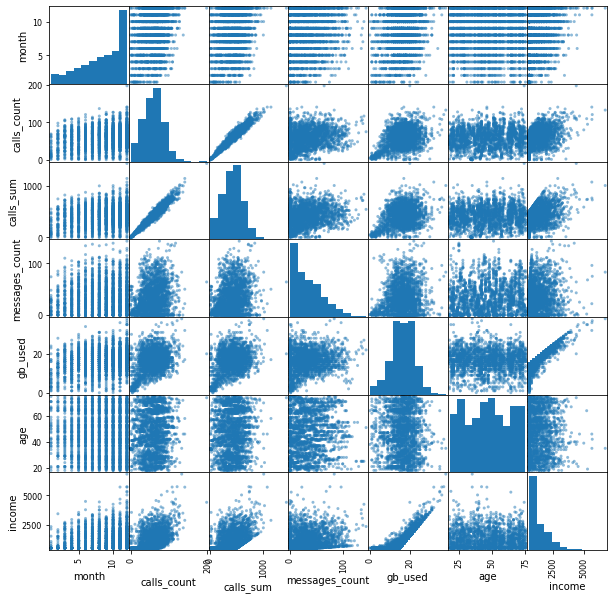

In [304]:
pd.plotting.scatter_matrix(data_smart_for_corr, figsize=(10, 10))

Наблюдается явная прямая зависимость между количеством звонков и количеством используемых минут, а также слабая прямая зависимость данных показателей и прибыли. На графике видно, что эта связь становится более заметной от 500 минут, или установленного лимита.
Есть сильная прямая зависимость количества гигабайт и прибыли. На графике хорошо видно резкое увеличение прибыли после использования 15 Гб интернет-трафика, которые входят в тарифный план.

### Вывод

1. Наибольшее количество пользователей обоих тарифов находятся в Москве и Санкт-Петербурге. При этом в Москве тариф "Ультра" популярнее тарифа "Смарт": им пользуется на 35% (или 5 процентных пункта) больше пользователей.

2. У обоих тарифов есть месяцы, в которые пользователи не пользовались отправкой сообщений. У тарифа "Ультра" - в 19 % случаев, а у тарифа "Смарт" - в 13 %.

3. По сравнению с пользователями тарифа "Смарт" пользователи тарифа "Ультра" ежемесячно в среднем:
* совершают на 31 % больше звонков;
* общаются на 30 % дольше;
* отправляют на 48 % больше сообщений;
* используют на 19 % больше интернет-трафика.

4. Пользователи тарифа "Ультра" выходят за рамки установленных лимитов на интернет-трафик в 13 % случаев. За рамки других лимитов они не выходят. При этом пользователи тарифа "Смарт" в 33 % случаев превышают лимит минут, в 25 % случаев превышают лимит сообщений и в 58 % случаев превышают лимит интернет-трафика. Средний пользователь тарифа "Смарт" в случаях превышения последнего лимита платит за это вторую абонентскую плату.

5. В обоих тарифах наблюдается сильная прямая связь между показателями интернет-трафика и прибыли. Такая же связь наблюдается и у показателей количества минут и прибыли среди пользователей тарифа "Смарт". Связь усиливается при превышении установленных лимитов.

6. Стандартные отклонения данных о количестве минут, сообщений и гигабайт по тарифу "Ультра" больше, чем по тарифу "Смарт". Это значит, что данные значения более разбросаны и сильнее отличаются от среднего значения, а поведение пользователей более разнообразно. При этом стандартные отклонения данных о превышении лимитов тарифа и прибыли больше у тарифа "Смарт".

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

**Нулевая гипотеза:** средняя выручка пользователей тарифа "Ультра" равно средней выручке пользователей тарифа "Смарт".

**Альтернативная гипотеза:** средняя выручка пользователей тарифа "Ультра" не равно средней выручке пользователей тарифа "Смарт".

Сначала посмотрим, различаются ли дисперсии выборок.

In [305]:
np.var(data_ultra['income'])

141373.07325620347

In [306]:
np.var(data_smart['income'])

669485.2209234245

Дисперсии сильно различаются, поэтому добавим соответствующий параметр к методу `scipy.stats.ttest_ind()`. Пороговое значение p-value определим как `5%` (оно будет использоваться и при дальнейших расчетах).

In [307]:
income_smart = data_smart['income']
income_ultra = data_ultra['income']

border = 0.05

results_income = st.ttest_ind(income_smart, income_ultra, equal_var = False)

if results_income.pvalue > border:
  print('Нулевая гипотеза верна')
else:
  print('Нулевая гипотеза не подтвердилась')

print('p-значение: ', results_income.pvalue)

Нулевая гипотеза не подтвердилась
p-значение:  4.2606313931076085e-250


**Вывод**

Принимаем альтернативную гипотезу: средняя выручка пользователей тарифа "Ультра" не равно средней выручке пользователей тарифа "Смарт".

Это подтверждается и анализом данных, осуществленном ранее.
Пользователи тарифа "Ультра" приносят 2070 руб. прибыли в среднем ежемесячно (при абонентской плате в 1950 рублей), а пользователи тарифа "Смарт" - 1254 руб. (при абонентской плате в 550 руб.).

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

#### Тариф "Ультра"

**Нулевая гипотеза:** Средняя выручка пользователей тарифа "Ультра" из Москвы равна средней выручке пользователей тарифа "Ультра" из других городов.

**Альтернативная гипотеза:** Средняя выручка пользователей тарифа "Ультра" из Москвы не равна средней выручке пользователей тарифа "Ультра" из других городов.

Для начала сформируем данные по выручке москвичей и других пользователей тарифа "Ультра".

In [308]:
income_ultra_moscow = data_ultra.loc[data_ultra['city'] == 'Москва', 'income']
income_ultra_other = data_ultra.loc[data_ultra['city'] != 'Москва', 'income']

Проверим, насколько отличаются дисперсии.

In [309]:
np.var(income_ultra_moscow)

122024.0

In [310]:
np.var(income_ultra_other)

147095.73666897506

Дисперсии отличаются, поэтому добавим соответствующий параметр к методу `scipy.stats.ttest_ind()`. Пороговое значение p-value остается `5%`.

In [311]:
results_income_ultra = st.ttest_ind(
    income_ultra_moscow, income_ultra_other, equal_var = False
    )

if results_income_ultra.pvalue > border:
  print('Нулевая гипотеза верна')
else:
  print('Нулевая гипотеза не подтвердилась')

print('p-значение: ', results_income_ultra.pvalue)

Нулевая гипотеза верна
p-значение:  0.8544997530689904


Посмотрим, как это выглядит на цифрах: определим срение значения выручки для пользователей тарифа "Ультра" из Москвы и из других городов.

In [312]:
income_ultra_moscow.mean()

2074.0

In [313]:
income_ultra_other.mean()

2069.0131578947367

Действительно, средние значения отличаются лишь на 5 рублей.

**Вывод**

Верна нулевая гипотеза: средняя выручка пользователей тарифа "Ультра" из Москвы равна средней выручке пользователей тарифа "Ультра" из других городов.

#### Тариф "Смарт"

**Нулевая гипотеза:** Средняя выручка пользователей тарифа "Смарт" из Москвы равна средней выручке пользователей тарифа "Смарт" из других городов.

**Альтернативная гипотеза:** Средняя выручка пользователей тарифа "Смарт" из Москвы не равна средней выручке пользователей тарифа "Смарт" из других городов.

Для начала сформируем данные по выручке москвичей и других пользователей тарифа "Смарт".

In [314]:
income_smart_moscow = data_smart.loc[data_smart['city'] == 'Москва', 'income']
income_smart_other = data_smart.loc[data_smart['city'] != 'Москва', 'income']

Проверим, насколько отличаются дисперсии.

In [315]:
np.var(income_smart_moscow)

566221.0483502913

In [316]:
np.var(income_smart_other)

690464.018714916

Дисперсии отличаются, поэтому добавим соответствующий параметр к методу `scipy.stats.ttest_ind()`. Пороговое значение p-value остается `5%`.

In [317]:
results_income_smart = st.ttest_ind(
    income_smart_moscow, income_smart_other, equal_var = False
    )

if results_income_smart.pvalue > border:
  print('Нулевая гипотеза верна')
else:
  print('Нулевая гипотеза не подтвердилась')

print('p-значение: ', results_income_smart.pvalue)

Нулевая гипотеза верна
p-значение:  0.15468343176376667


Посмотрим, как это выглядит на цифрах: определим срение значения выручки для пользователей тарифа "Смарт" из Москвы и из других городов.

In [318]:
income_smart_moscow.mean()

1239.3575129533679

In [319]:
income_smart_other.mean()

1300.5746066196418

Средние значения отличаются на 46 рублей.

**Вывод**

Верна нулевая гипотеза: средняя выручка пользователей тарифа "Смарт" из Москвы равна средней выручке пользователей тарифа "Смарт" из других городов.

#### Тариф "Ультра" и тариф "Смарт"

**Нулевая гипотеза:** Средняя выручка пользователей тарифов из Москвы равна средней выручке пользователей тарифов из других городов.

**Альтернативная гипотеза:** Средняя выручка пользователей тарифов из Москвы не равна средней выручке пользователей тарифов из других городов.

Для начала сформируем данные по выручке москвичей и других пользователей обеих тарифов.

In [320]:
income_moscow = income_ultra_moscow.append(income_smart_moscow)
income_other = income_ultra_other.append(income_smart_other)

Проверим, насколько отличаются дисперсии.

In [321]:
np.var(income_moscow)

564710.7117467273

In [322]:
np.var(income_other)

653886.3270894174

Дисперсии отличаются, поэтому добавим соответствующий параметр к методу `scipy.stats.ttest_ind()`. Пороговое значение p-value остается `5%`.

In [323]:
results_income_region = st.ttest_ind(
    income_moscow, income_other, equal_var = False
    )

if results_income_ultra.pvalue > border:
  print('Нулевая гипотеза верна')
else:
  print('Нулевая гипотеза не подтвердилась')

print('p-значение: ', results_income_region.pvalue)

Нулевая гипотеза верна
p-значение:  0.5257376663729298


Посмотрим, как это выглядит на цифрах: определим срение значения выручки для пользователей из Москвы и из других городов.

In [324]:
income_moscow.mean()

1546.7135842880523

In [325]:
income_other.mean()

1524.9362274298885

Cредние значения отличаются на 34 рубля.

**Вывод**

Верна нулевая гипотеза: средняя выручка пользователей обоих тарифов из Москвы равна средней выручке пользователей обоих тарифов из других городов.

## Вывод

Пользователи тарифа "Ультра" выходят за рамки установленных лимитов на интернет-трафик в 13 % случаев. За рамки других лимитов они не выходят. При этом пользователи тарифа "Смарт" в 33 % случаев превышают лимит минут, в 25 % случаев превышают лимит сообщений и в 58 % случаев превышают лимит интернет-трафика. 

Средняя выручка пользователей тарифа "Ультра" больше средней выручки пользователей тарифа "Смарт". Пользователи тарифа "Ультра" приносят 2070 руб. прибыли в среднем ежемесячно (при абонентской плате в 1950 рублей), а пользователи тарифа "Смарт" - 1254 руб. (при абонентской плате в 550 руб.).

В то же время, пользователи тарифа "Ультра" из Москвы и из других городов приносят одинаковую прибыль. Пользователи тарифа "Смарт" в этом плане менее предсказуемы: москвичи платят в среднем на 46 рубля меньше, чем пользователи из других городов. При рассмотрении обоих тарифов в целом средняя выручка пользователей обоих тарифов из Москвы тоже почти равна средней выручке пользователей обоих тарифов из других городов: москвичи платаят на 34 рубля больше, чем пользователи из регионов.

С учетом того, что средний пользователь тарифа "Ультра" немного превышает лимиты, установленные для тарифа "Смарт", но при этом платит не 550 рублей и не 1254 рубля как средний пользователь тарифа "Смарт", а 1950 рублей, то тариф "Ультра" выглядит более прибыльным по сравнению с тарифом "Смарт". Следовательно, коммерческому депортаменту следует сфокусироваться на продвижении тарифа "Ультра".